# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [14]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [24]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

68709

## Deliverable 1: Get a Summary DataFrame 

In [16]:
#  1. Get the total rides for each city type
Total_Rides_By_City = pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [25]:
# 2. Get the total drivers for each city type
Total_Drivers_By_City = city_data_df.groupby(["type"]).sum()["driver_count"]

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [26]:
#  3. Get the total amount of fares for each city type
Total_Fares_By_City = pyber_data_df.groupby(["type"]).sum()["fare"]

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [27]:
#  4. Get the average fare per ride for each city type. 
Average_Fare_Per_Ride_By_City = Total_Fares_By_City / Total_Rides_By_City

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [34]:
# 5. Get the average fare per driver for each city type. 
Average_Fare_Per_Driver_By_City = Total_Fares_By_City / Total_Drivers_By_City

In [40]:
#  6. Create a PyBer summary DataFrame. 

Pyber_summary_df = pd.DataFrame({
"Total Rides": Total_Rides_By_City,
"Total Drivers": Total_Drivers_By_City,
"Total Fares": Total_Fares_By_City,
"Average Fare per Ride": Average_Fare_Per_Ride_By_City,
"Average Fare per Driver": Average_Fare_Per_Driver_By_City
})

Pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [42]:
#  7. Cleaning up the DataFrame. Delete the index name
Pyber_summary_df.index.name = None

In [43]:
#  8. Format the columns.
Pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [52]:
# 1. Read the merged DataFrame
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [53]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
Fare_by_type_date_total = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
Fare_by_type_date_total

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [54]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
Fare_by_type_date_total_reset_index = Fare_by_type_date_total.reset_index()


In [56]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Fare_by_type_date_total_pivot = Fare_by_type_date_total_reset_index.pivot(index="date", columns="type", values="fare")
Fare_by_type_date_total_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [57]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Fare_by_type_date_total_Jan_May = Fare_by_type_date_total_pivot.loc['2019-01-01':'2019-04-29']
Fare_by_type_date_total_Jan_May

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [76]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Fare_by_type_date_total_Jan_May.index = pd.to_datetime(Fare_by_type_date_total_Jan_May.index)

In [77]:
# 7. Check that the datatype for the index is datetime using df.info()
Fare_by_type_date_total_Jan_May.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [78]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Fare_by_week = Fare_by_type_date_total_Jan_May.resample("W").sum()

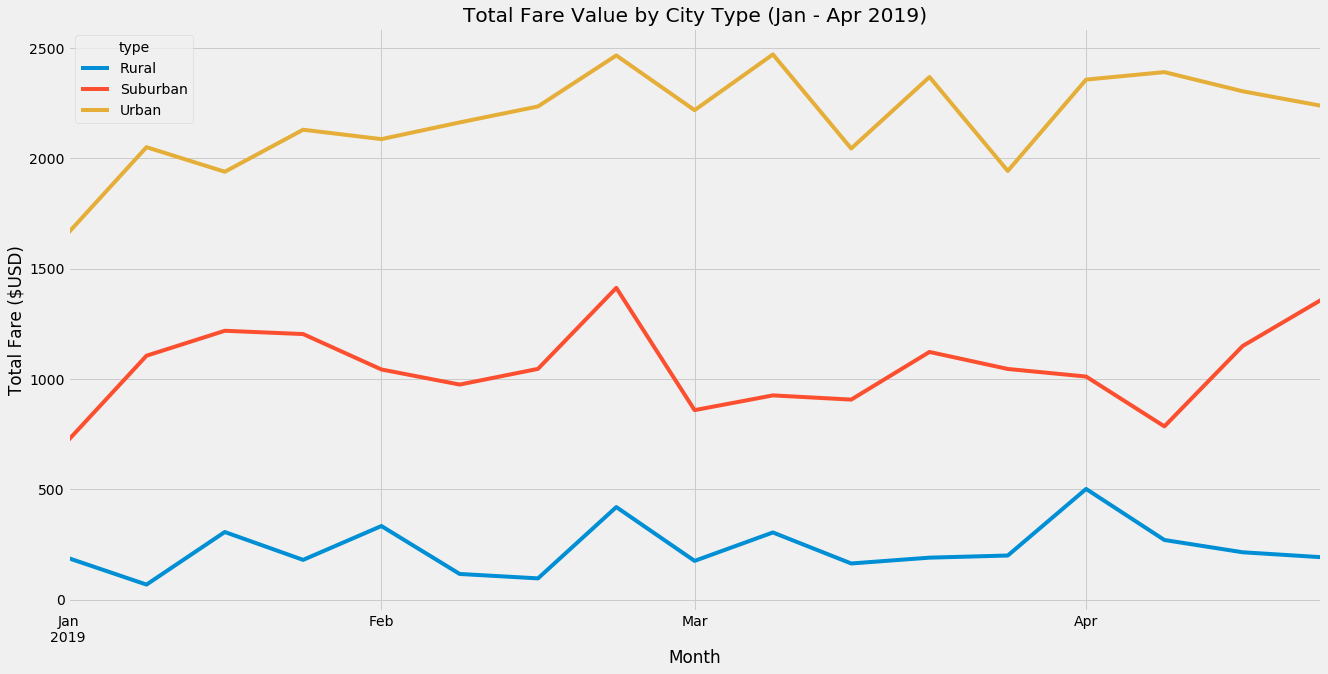

In [90]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = Fare_by_week.plot(figsize=(20,10))
ax.plot()
plt.xlabel("Month")
plt.ylabel("Total Fare ($USD)")
plt.title("Total Fare Value by City Type (Jan - Apr 2019)")

plt.savefig("Figures/Fig8")
plt.show()

